In [9]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime 
from config import weather_api_key


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudesd and longitudes into a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)
# print the city-count to confirm sufficient count.
len(cities)

590

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # lof the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | maceio
Processing Record 7 of Set 1 | verkhoyansk
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | banda aceh
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | temaraia
City not found. Skipping...
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | high prairie
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | cabadiangan
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | aguim

Processing Record 38 of Set 4 | lambarene
Processing Record 39 of Set 4 | sirajganj
Processing Record 40 of Set 4 | arauca
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | broken hill
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | carballo
Processing Record 45 of Set 4 | sulangan
Processing Record 46 of Set 4 | mareeba
Processing Record 47 of Set 4 | itoman
Processing Record 48 of Set 4 | kortkeros
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | cadiz
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | peleduy
Processing Record 3 of Set 5 | maunabo
Processing Record 4 of Set 5 | longonjo
Processing Record 5 of Set 5 | noyabrsk
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | tiznit
Processing Record 8 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 9 of Set 5 | castro
Processing Record 10 of Set 5 | sheffield
Processing Re

Processing Record 30 of Set 8 | lagos
Processing Record 31 of Set 8 | pechenga
Processing Record 32 of Set 8 | samusu
City not found. Skipping...
Processing Record 33 of Set 8 | morros
Processing Record 34 of Set 8 | imuris
Processing Record 35 of Set 8 | chokwe
Processing Record 36 of Set 8 | san cristobal
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | fairlie
Processing Record 39 of Set 8 | kosh-agach
Processing Record 40 of Set 8 | yar-sale
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | paita
Processing Record 43 of Set 8 | porto novo
Processing Record 44 of Set 8 | rio muerto
Processing Record 45 of Set 8 | bocana de paiwas
Processing Record 46 of Set 8 | boende
Processing Record 47 of Set 8 | eureka
Processing Record 48 of Set 8 | vagur
Processing Record 49 of Set 8 | alyangula
Processing Record 50 of Set 8 | ahipara
Processing Record 1 of Set 9 | khash
Processing Record 2 of Set 9 | luanda
Processing Record 3 of Set 9 | kontagora


Processing Record 13 of Set 12 | lolua
City not found. Skipping...
Processing Record 14 of Set 12 | cape coast
Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | pochutla
Processing Record 17 of Set 12 | high level
Processing Record 18 of Set 12 | pembroke
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | lucea
Processing Record 21 of Set 12 | toamasina
Processing Record 22 of Set 12 | kupang
Processing Record 23 of Set 12 | kumsi
Processing Record 24 of Set 12 | asau
Processing Record 25 of Set 12 | alaca
Processing Record 26 of Set 12 | anloga
Processing Record 27 of Set 12 | leshukonskoye
Processing Record 28 of Set 12 | platanos
Processing Record 29 of Set 12 | labuan
Processing Record 30 of Set 12 | havelock
Processing Record 31 of Set 12 | smila
Processing Record 32 of Set 12 | la playona
Processing Record 33 of Set 12 | gurun
Processing Record 34 of Set 12 | kambove
Processing Record 35 of Set 12 | metro
Processing Record 36 o

In [15]:
len(city_data)

538

In [16]:
# Convert the list of dictionaries into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.40,-70.48,64.11,78,9,3.22,CL,2021-01-03 01:06:53
1,Rikitea,-23.12,-134.97,79.00,65,11,7.90,PF,2021-01-03 01:06:53
2,Torbay,47.67,-52.73,28.00,73,90,4.70,CA,2021-01-03 01:06:53
3,Albany,42.60,-73.97,32.00,75,1,4.00,US,2021-01-03 01:06:32
4,Pisco,-13.70,-76.22,69.80,88,0,18.34,PE,2021-01-03 01:06:54
5,Maceio,-9.67,-35.74,73.40,94,20,6.93,BR,2021-01-03 01:04:06
6,Verkhoyansk,67.54,133.38,-38.31,79,67,1.12,RU,2021-01-03 01:06:54
7,Vaini,-21.20,-175.20,82.40,83,75,10.29,TO,2021-01-03 01:06:54
8,Comodoro Rivadavia,-45.87,-67.50,84.20,37,40,21.92,AR,2021-01-03 01:06:54
9,Banda Aceh,5.56,95.32,78.04,81,100,13.02,ID,2021-01-03 01:06:55


In [20]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taltal,CL,2021-01-03 01:06:53,-25.40,-70.48,64.11,78,9,3.22
1,Rikitea,PF,2021-01-03 01:06:53,-23.12,-134.97,79.00,65,11,7.90
2,Torbay,CA,2021-01-03 01:06:53,47.67,-52.73,28.00,73,90,4.70
3,Albany,US,2021-01-03 01:06:32,42.60,-73.97,32.00,75,1,4.00
4,Pisco,PE,2021-01-03 01:06:54,-13.70,-76.22,69.80,88,0,18.34


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

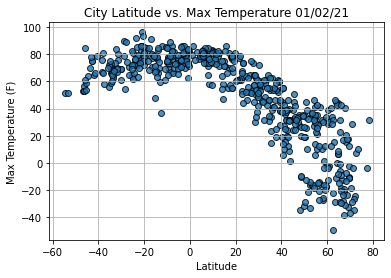

In [24]:
# import time module.
import time

# Build the scatterplot for latitude vs. Max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

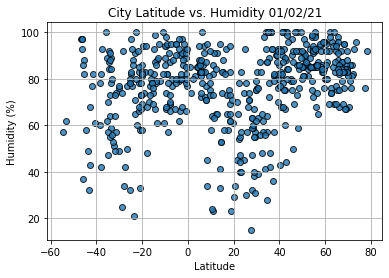

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title('City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

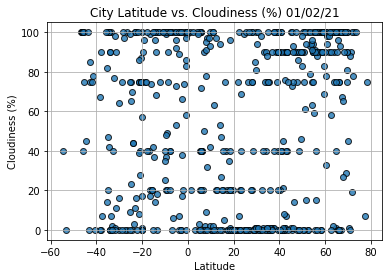

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()